Esta notebook contiene bloques de código útiles para realizar Q-learning en el entorno "Taxi"

In [187]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import random
from taxi_env_extended import TaxiEnvExtended

In [188]:
env = TaxiEnvExtended()

Obtener la cantidad de estados y acciones

In [189]:
actions = env.action_space.n
states = env.observation_space.n

Inicialización de la tabla Q

In [190]:
Q = np.zeros((states, actions))
Q

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

Obtención de la acción a partir de la tabla Q

In [191]:
def optimal_policy(state, Q):
    action = np.argmax(Q[state])
    return action

Epsilon-Greedy Policy

In [192]:
def epsilon_greedy_policy(state, Q, epsilon=0.1):
    explore = np.random.binomial(1, epsilon)
    if explore:
        action = env.action_space.sample()
    else:
        action = np.argmax(Q[state])
        
    return action

Ejemplo de episodio 

Implemento el algoritmo Q learning:

In [193]:
def q_learning(env, numEpisodes, alpha, gamma, epsilon_i, epsilon_f, epsilon_decay):
    epsilon = epsilon_i
    rewards = []
    
    for episode in range(numEpisodes):
        state, _ = env.reset()
        done = False
        tot_reward = 0
        
        
        while not done:
            action = epsilon_greedy_policy(state, Q, epsilon)
            next_state, reward, done, _, _ = env.step(action)
            best_next_action = np.argmax(Q[next_state])
            td_target = reward + gamma * Q[next_state][best_next_action]
            td_delta = td_target - Q[state][action]
            Q[state][action] += alpha * td_delta
            state = next_state
            tot_reward += reward
        
        rewards.append(tot_reward)
        epsilon = max(epsilon_f, epsilon * epsilon_decay)
        #if (episode + 1) % 100 == 0:
        #    print(f"Episode {episode + 1}/{num_episodes} - Total Reward: {total_reward}, Epsilon: {epsilon}")
    
    return Q, rewards

Entreno el modelo:

In [194]:
numEpisodes= 4000
Q, rewards = q_learning(env, numEpisodes=numEpisodes, alpha=0.1, gamma=0.95, epsilon_i=1.0, epsilon_f=0.1, epsilon_decay=0.999)

Evaluo la policy optima:

In [195]:
def evaluate_policy(env, Q, num_episodes=100):
    tot_rewards = []
    for episode in range(num_episodes):
        state, _ = env.reset()
        done = False
        total_reward = 0
        
        while not done:
            action = np.argmax(Q[state])
            next_state, reward, done, _, _ = env.step(action)
            state = next_state
            total_reward += reward
        
        tot_rewards.append(total_reward)
    
    average_reward = np.mean(tot_rewards)
    print(f"Average reward over {num_episodes} episodes:{average_reward}")
    return average_reward

In [196]:
average_reward = evaluate_policy(env, Q)

Average reward over 100 episodes:8.42


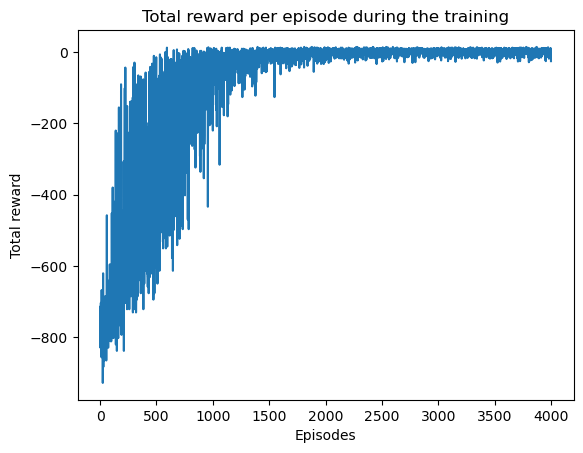

In [197]:
plt.plot(range(numEpisodes), rewards)
plt.xlabel('Episodes')
plt.ylabel('Total reward')
plt.title('Total reward per episode during the training')
plt.show()
